# Query 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock 

>This would be helpful if we are to train our model to take NLP inputs.

In [19]:
import pandas as pd
from datetime import datetime
from functools import partial


data = pd.read_csv("Module1Solutions.csv")
del data['Unnamed: 0']
duplicate_data = data 
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,MUTHOOTFIN,EQ,2017-05-15,390.70,391.00,396.50,388.50,393.00,392.45,393.38,385865,1.517907e+08,6893,63660,16.50,5,2017,392.450000,0.000000,Slight or No change
1,MUTHOOTFIN,EQ,2017-05-16,392.45,393.65,400.95,393.25,393.45,394.80,398.01,514200,2.046578e+08,9938,100880,19.62,5,2017,393.792536,0.005988,Slight or No change
2,MUTHOOTFIN,EQ,2017-05-17,394.80,396.90,398.00,392.60,394.10,395.15,394.90,311597,1.230481e+08,6512,116484,37.38,5,2017,394.141628,0.000887,Slight or No change
3,MUTHOOTFIN,EQ,2017-05-18,395.15,393.00,395.45,375.10,378.85,379.20,386.45,646434,2.498119e+08,11171,238171,36.84,5,2017,388.943417,-0.040364,Slight or No change
4,MUTHOOTFIN,EQ,2017-05-19,379.20,395.00,400.90,357.45,381.00,379.15,382.13,3211995,1.227389e+09,42906,1193472,37.16,5,2017,382.739109,-0.000132,Slight or No change


In [11]:
data.Date.dtype

dtype('O')

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data.Date.dtype

dtype('<M8[ns]')

In [13]:
data.set_index('Date', inplace = True)
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,MUTHOOTFIN,EQ,390.70,391.00,396.50,388.50,393.00,392.45,393.38,385865,1.517907e+08,6893,63660,16.50,5,2017,392.450000,0.000000,Slight or No change
2017-05-16,MUTHOOTFIN,EQ,392.45,393.65,400.95,393.25,393.45,394.80,398.01,514200,2.046578e+08,9938,100880,19.62,5,2017,393.792536,0.005988,Slight or No change
2017-05-17,MUTHOOTFIN,EQ,394.80,396.90,398.00,392.60,394.10,395.15,394.90,311597,1.230481e+08,6512,116484,37.38,5,2017,394.141628,0.000887,Slight or No change
2017-05-18,MUTHOOTFIN,EQ,395.15,393.00,395.45,375.10,378.85,379.20,386.45,646434,2.498119e+08,11171,238171,36.84,5,2017,388.943417,-0.040364,Slight or No change
2017-05-19,MUTHOOTFIN,EQ,379.20,395.00,400.90,357.45,381.00,379.15,382.13,3211995,1.227389e+09,42906,1193472,37.16,5,2017,382.739109,-0.000132,Slight or No change
2017-05-22,MUTHOOTFIN,EQ,379.15,382.10,393.95,380.80,386.00,385.45,386.04,1733876,6.693403e+08,19865,1424301,82.15,5,2017,383.429934,0.016616,Slight or No change
2017-05-23,MUTHOOTFIN,EQ,385.45,386.65,389.75,372.05,381.70,382.85,383.44,915259,3.509510e+08,34400,453098,49.50,5,2017,383.361172,-0.006745,Slight or No change
2017-05-24,MUTHOOTFIN,EQ,382.85,384.00,395.40,383.50,387.00,386.05,388.48,760640,2.954940e+08,16850,311133,40.90,5,2017,383.602358,0.008358,Slight or No change
2017-05-25,MUTHOOTFIN,EQ,386.05,389.80,393.40,386.85,389.50,389.40,390.29,580979,2.267494e+08,15465,361210,62.17,5,2017,383.974102,0.008678,Slight or No change


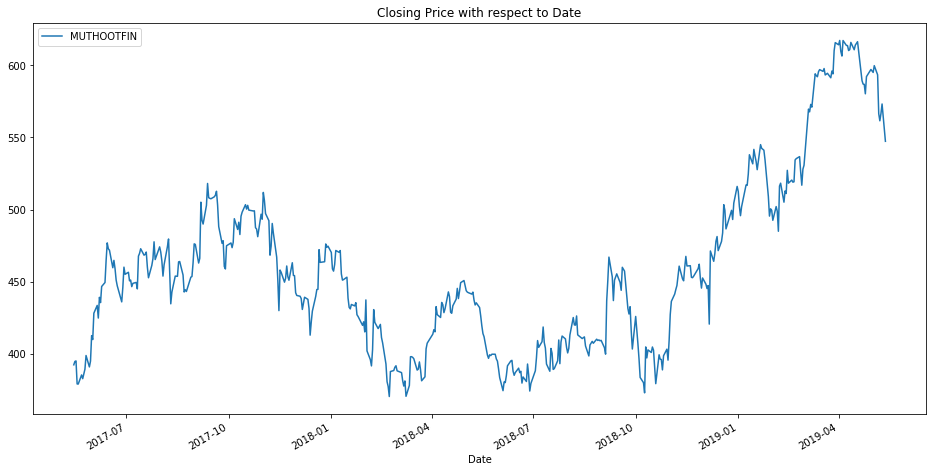

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Close Price'].plot(label = 'MUTHOOTFIN',figsize=(16,8),title='Closing Price with respect to Date')
plt.legend()

In [15]:
data['Close Price'].diff().abs().sort_values(ascending = False)

Date
2018-12-07    50.65
2017-09-06    38.90
2019-03-05    38.85
2018-09-05    36.95
2018-02-02    35.30
2018-10-10    31.80
2019-02-07    31.30
2017-11-16    28.10
2018-02-08    27.75
2017-12-21    27.45
2019-04-22    26.95
2019-05-07    26.90
2018-12-06    26.70
2019-05-13    25.85
2018-09-24    25.80
2019-01-28    25.45
2017-11-07    23.90
2018-10-19    23.20
2019-03-11    23.10
2017-07-12    22.70
2017-08-10    22.65
2018-10-01    22.55
2017-08-09    22.25
2018-02-01    22.15
2017-11-15    21.35
2018-10-22    20.00
2018-03-13    19.90
2018-12-19    19.55
2018-03-27    19.35
2018-10-03    18.85
              ...  
2017-07-18     0.50
2018-06-06     0.45
2017-12-26     0.45
2017-08-29     0.45
2017-09-14     0.45
2018-05-04     0.40
2018-06-12     0.40
2018-01-12     0.40
2017-09-01     0.40
2018-08-29     0.35
2017-05-17     0.35
2017-09-15     0.30
2018-08-31     0.30
2018-11-21     0.25
2019-02-20     0.25
2019-01-09     0.25
2017-08-18     0.25
2018-10-24     0.20
2018-11-19     

In [16]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
# more than 1 news is available for a single date so using different related variables
url_2018_10_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1103-cholamandalam-securities-3064341.html'
r = requests.get(url_2018_10_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Printing news for only 4 dates since the 5th date has no news")
print("Obtaining news from Money Control")
print("News for 2018-10-19")
print("Only 1 news is available on this date")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_07_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1115-hdfc-securities-2734761.html'
r = requests.get(url_2018_07_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_07_19")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_04_20 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1000-reliance-securities-2553515.html'
r = requests.get(url_2018_04_20) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_04_20")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_02_23 = 'https://www.moneycontrol.com/news/business/buy-mindtree-pidilite-industries-sell-upl-tata-steel-tata-motors-sudarshan-sukhani-2513371.html'
r = requests.get(url_2018_02_23) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_02_23")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

Printing news for only 4 dates since the 5th date has no news
Obtaining news from Money Control
News for 2018-10-19
Only 1 news is available on this date


Title:
Buy Mindtree; target of Rs 1103: Cholamandalam Securities


Subject:
Cholamandalam Securities is bullish on Mindtree has recommended buy rating on the stock with a target price of Rs 1103 in its research report dated October 19, 2018.


Report:
In 2QFY19, Mindtree’s revenue grew by 7.1% QoQ to INR 17.5bn in line with our expectations of INR 17.6bn largely driven by volume (+6.3% QoQ) and INR depreciation. In USD terms, revenues grew by 2% QoQ. In constant currency terms, revenue grew by 2.4% QoQ. Revenue from Digital business grew by 3.3% QoQ contributing 48.1% to total revenues. EBITDA grew by 16.8% QoQ to INR 2.7bn in-line with our expectations. EBITDA margin expanded by 130bps QoQ to 15.4%. EBITDA margin expanded on account of rupee depreciation (+130 bps) and presence of one off cost in the base quarter (+60bps) which was

# Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

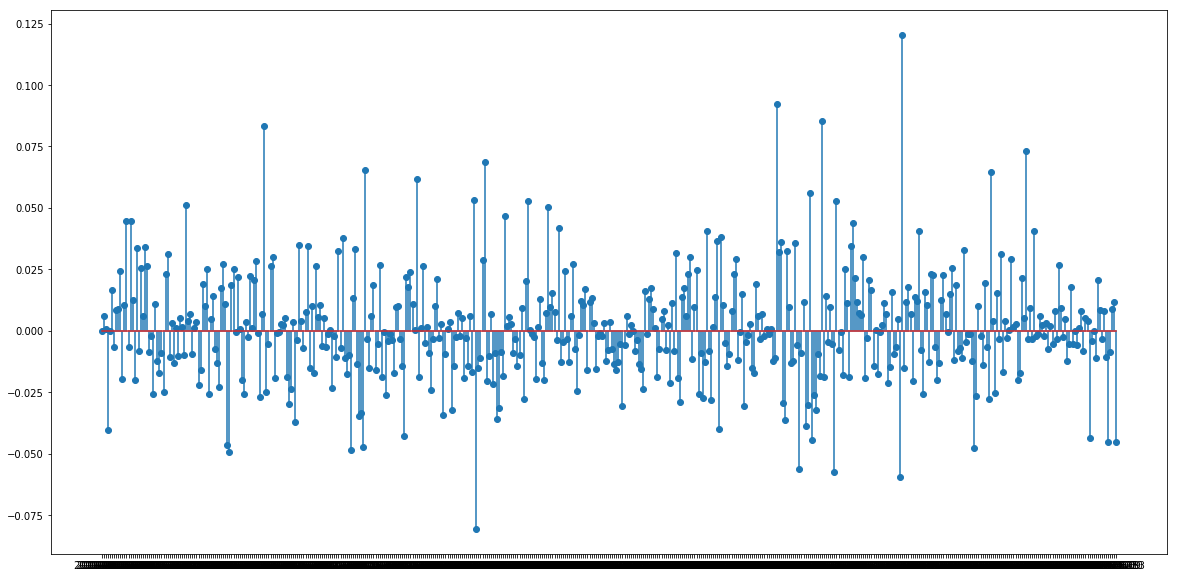

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])

# Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.

<StemContainer object of 3 artists>

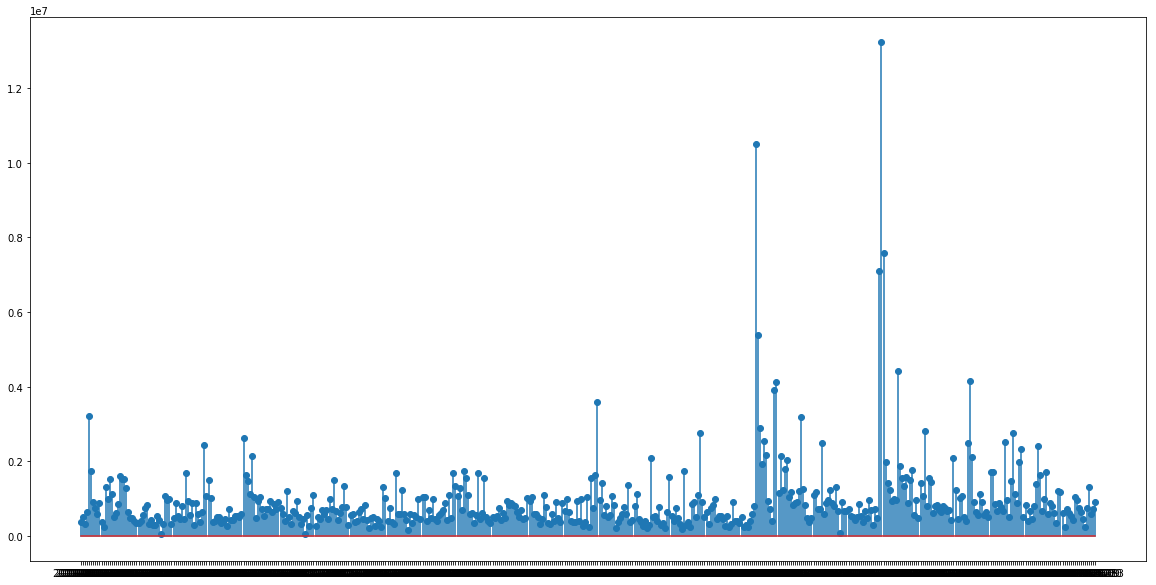

In [21]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])

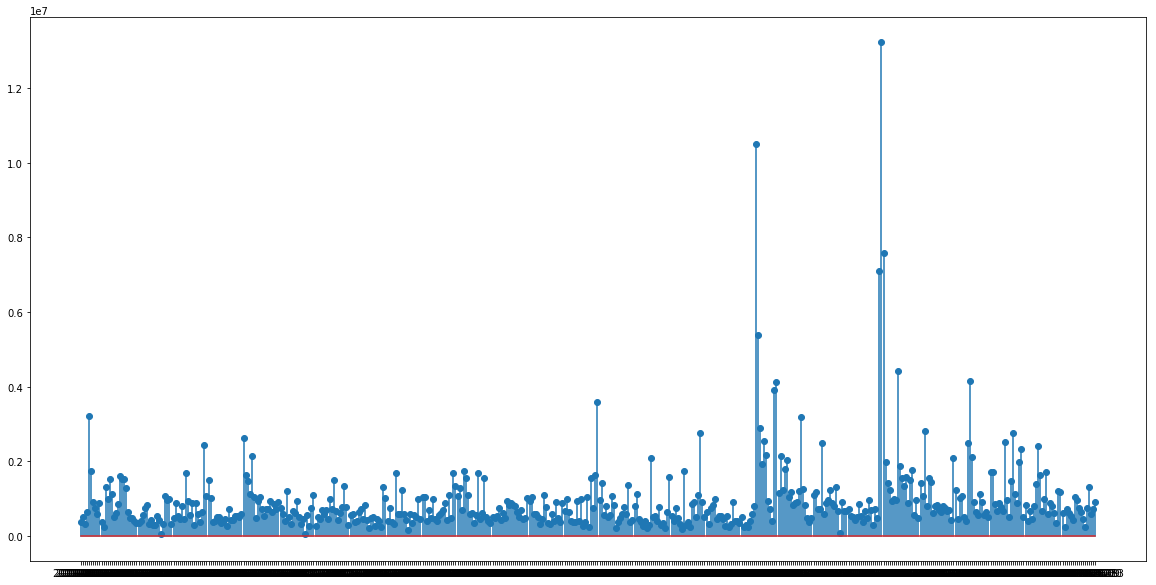

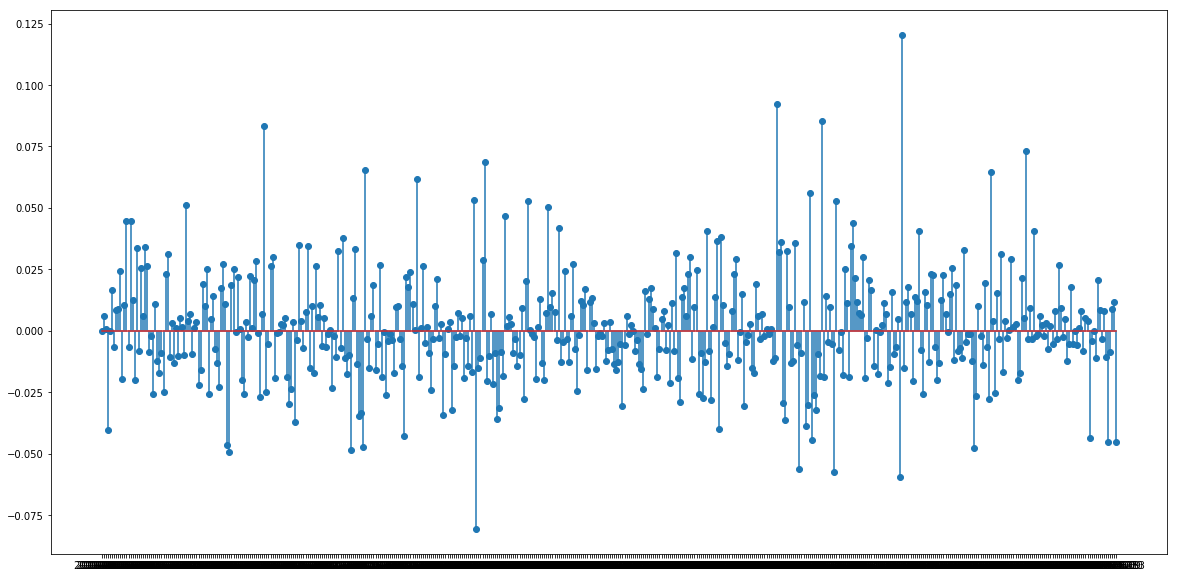

In [22]:

plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])
plt.show()

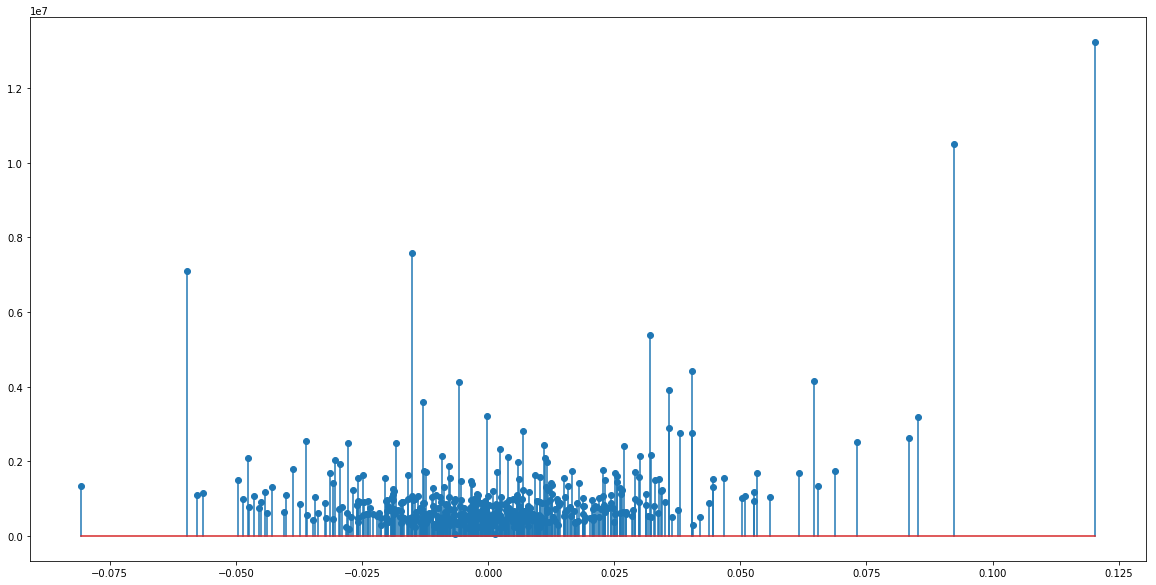

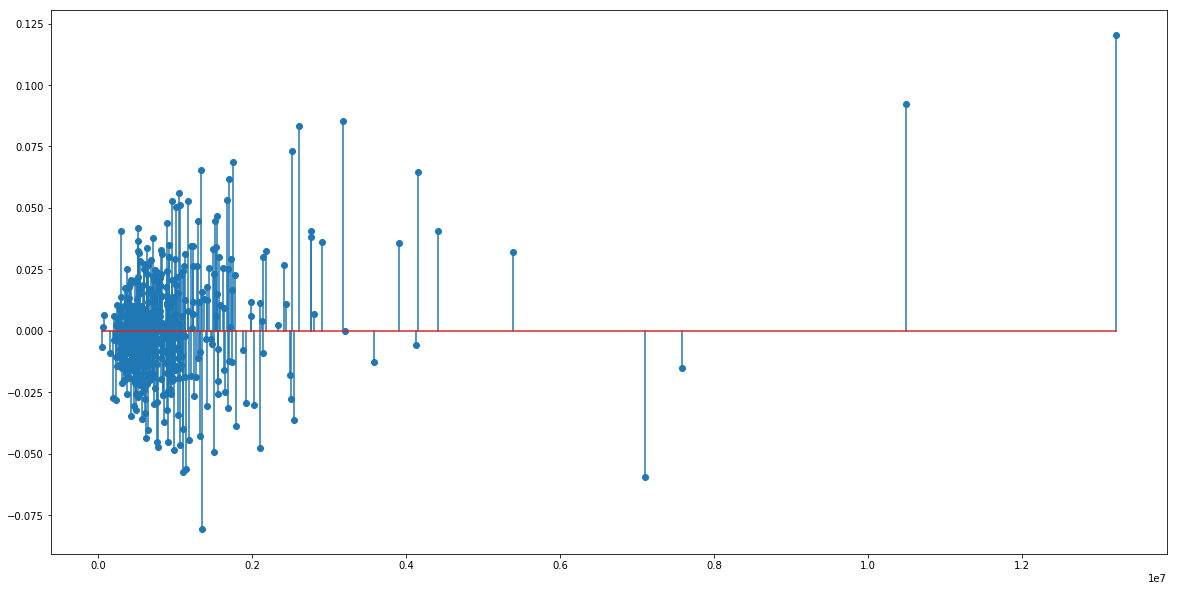

In [23]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

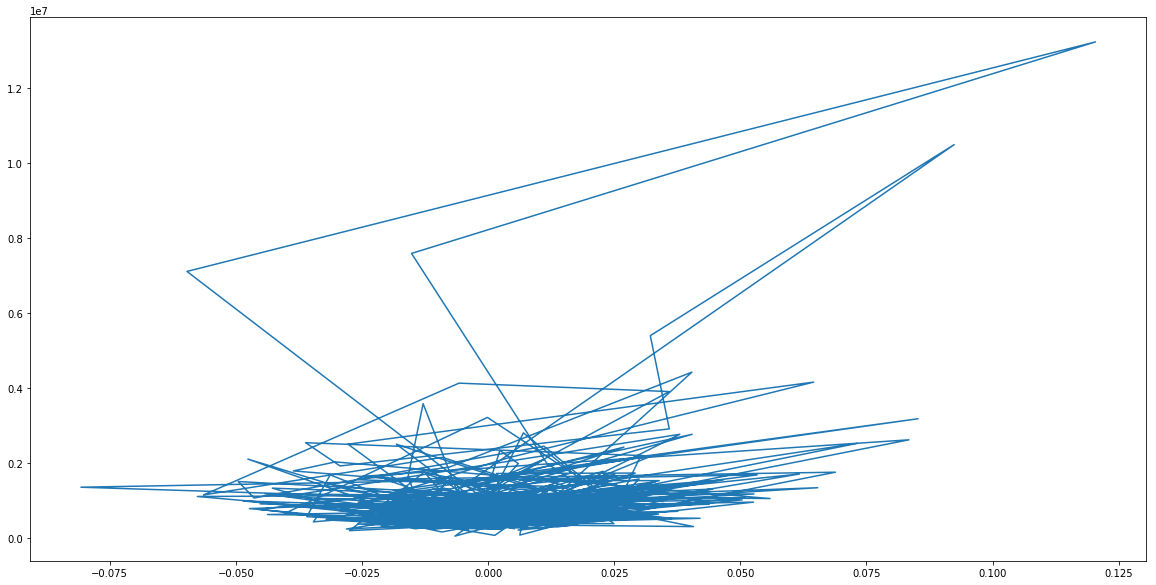

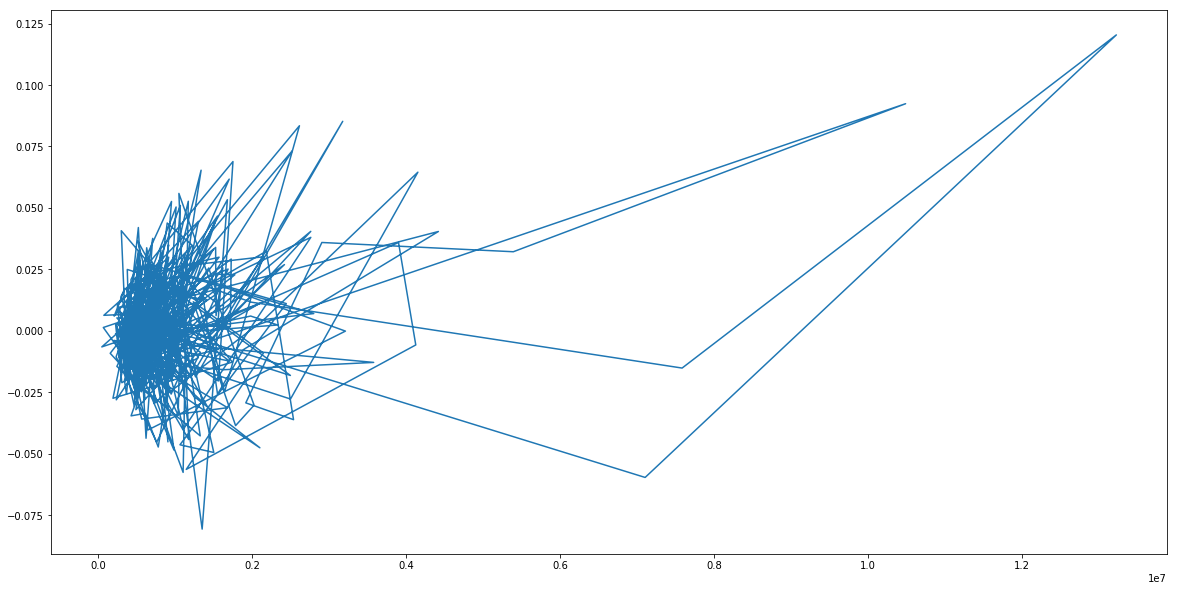

In [24]:
plt.figure(figsize=(20,10))
plt.plot(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.plot(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

# Query 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = data['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 494})

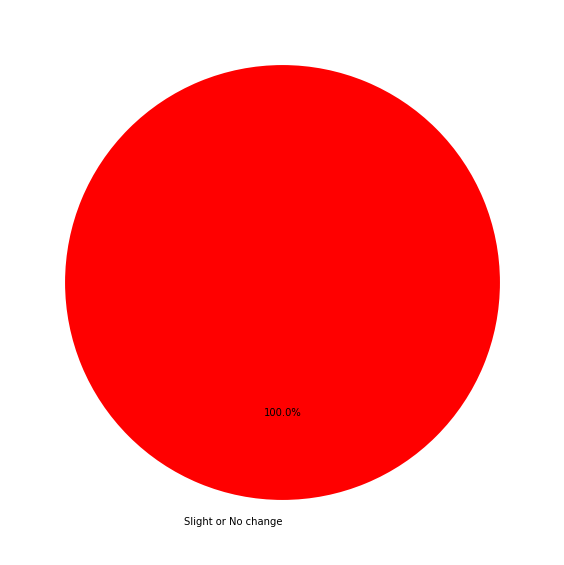

In [26]:
counter = [494]
labels= ['Slight or No change']
colors = ['r']
plt.figure(figsize=(20,10))
plt.pie(counter, labels=labels,colors=colors,startangle=90, autopct='%.1f%%')
plt.show()

In [27]:
import matplotlib.pyplot as plt

gk = data.groupby(['Trend'])['Total Traded Quantity']
gk.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,925968.309717,1.039440e+06,46582.0,467395.0,676104.5,1004474.5,13228672.0


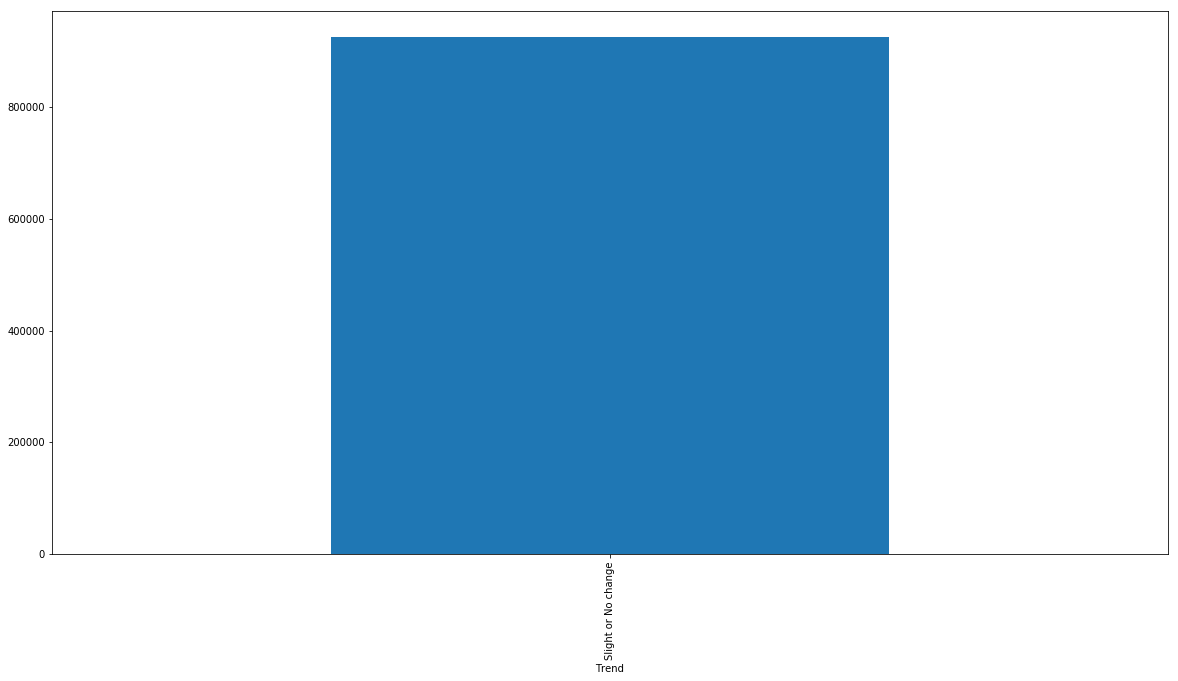

In [28]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

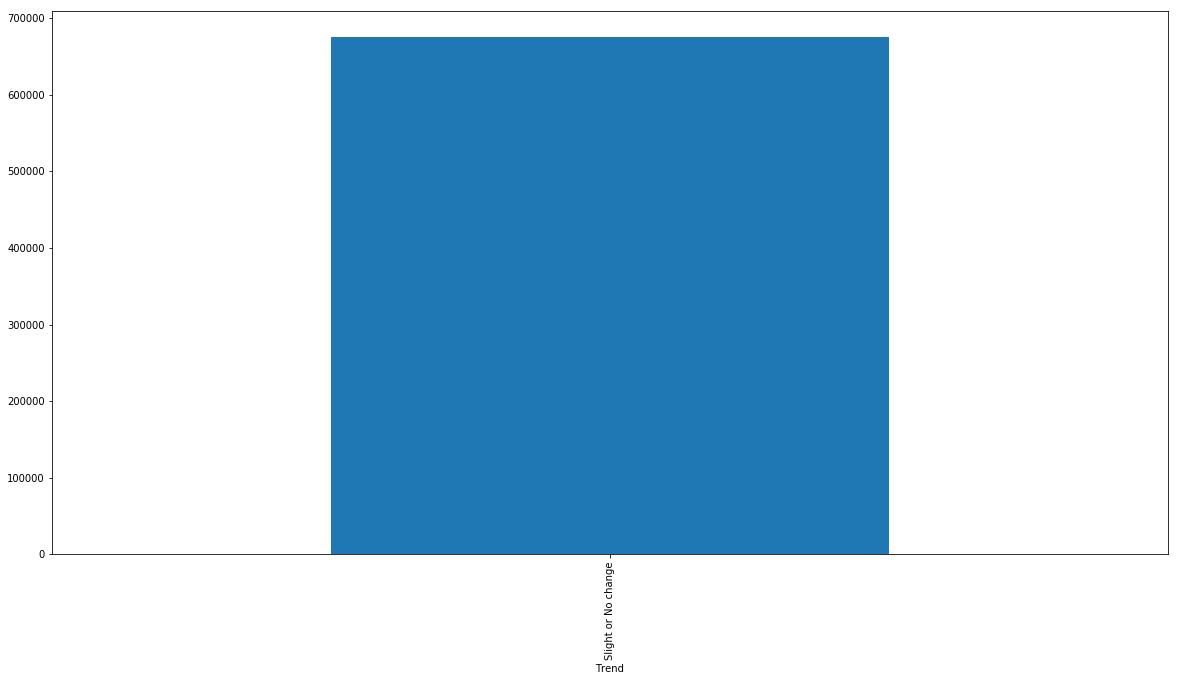

In [29]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

# Query 2.5
Plot the daily return (percentage) distribution as a histogram. Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

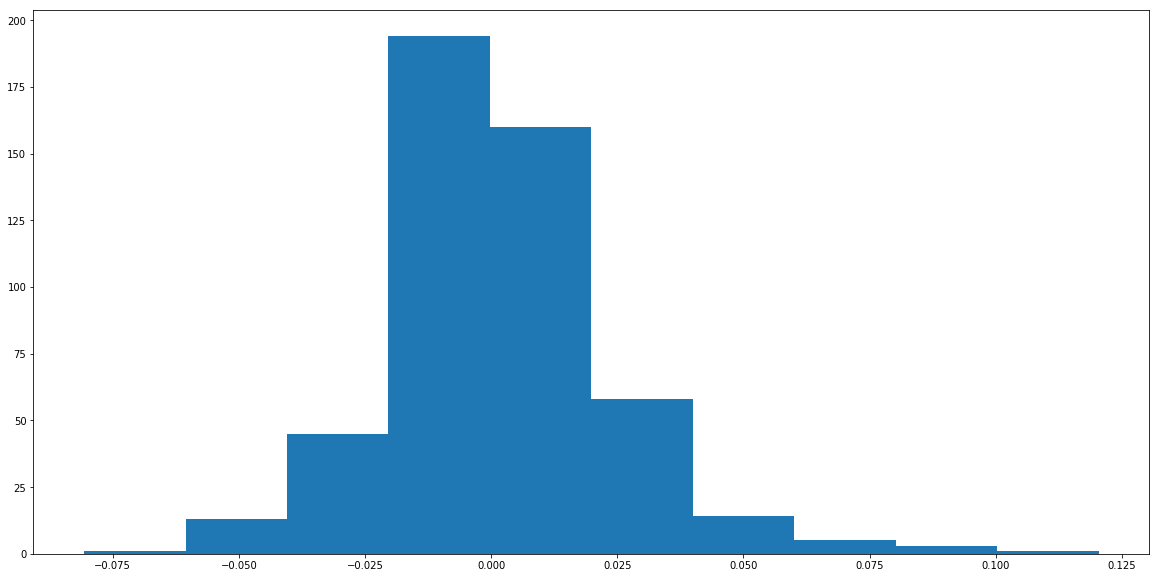

In [30]:
plt.figure(figsize=(20,10))
plt.hist(data['Day_Perc_Change'])
plt.show()

# Query 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe. Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.

In [33]:
import pandas as pd
axisbank_data = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\AXISBANK.csv")
bajfinance_data = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\BAJFINANCE.csv")
bpcl_data = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\BPCL.csv")
hdfcbank_data = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\HDFCBANK.csv")
tcs_data = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\TCS.csv")

In [34]:
axisbank_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,15-May-2017,503.00,505.00,508.50,498.40,500.25,500.10,502.95,8806756,4.429384e+09,109965,4320438,49.06
1,AXISBANK,EQ,16-May-2017,500.10,502.10,504.50,493.50,502.05,501.50,499.85,8610492,4.303938e+09,101028,4027982,46.78
2,AXISBANK,EQ,17-May-2017,501.50,501.35,506.75,498.50,502.00,502.80,502.88,6443135,3.240154e+09,84189,2876528,44.64
3,AXISBANK,EQ,18-May-2017,502.80,498.00,499.10,490.25,492.85,492.00,494.96,9227022,4.566993e+09,95624,5348691,57.97
4,AXISBANK,EQ,19-May-2017,492.00,495.75,503.85,494.20,501.90,501.70,499.10,7611430,3.798900e+09,72985,4190505,55.06
5,AXISBANK,EQ,22-May-2017,501.70,504.00,507.45,499.50,502.00,502.30,503.00,4970982,2.500383e+09,62027,2665857,53.63
6,AXISBANK,EQ,23-May-2017,502.30,502.25,506.10,495.20,500.50,500.60,500.17,7549551,3.776028e+09,69512,4120666,54.58
7,AXISBANK,EQ,24-May-2017,500.60,503.00,505.00,495.00,499.65,499.30,498.39,7271148,3.623902e+09,61592,4986725,68.58
8,AXISBANK,EQ,25-May-2017,499.30,502.00,509.90,495.85,507.85,507.45,504.39,9157557,4.619023e+09,106201,4220728,46.09
9,AXISBANK,EQ,26-May-2017,507.45,508.00,513.00,505.00,510.50,511.45,508.86,5995136,3.050683e+09,72779,2824290,47.11


In [35]:
bajfinance_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJFINANCE,EQ,15-May-2017,1314.75,1323.00,1348.50,1317.65,1332.00,1332.95,1335.96,634195,8.472579e+08,16701,188623,29.74
1,BAJFINANCE,EQ,16-May-2017,1332.95,1337.40,1358.80,1327.20,1346.00,1347.75,1344.96,788530,1.060542e+09,22552,274106,34.76
2,BAJFINANCE,EQ,17-May-2017,1347.75,1350.00,1374.00,1297.50,1320.00,1324.80,1343.51,2408302,3.235570e+09,67508,468034,19.43
3,BAJFINANCE,EQ,18-May-2017,1324.80,1299.00,1343.00,1296.05,1310.70,1314.55,1325.97,1210985,1.605728e+09,34422,305579,25.23
4,BAJFINANCE,EQ,19-May-2017,1314.55,1324.00,1333.90,1265.55,1288.00,1289.15,1295.81,1167010,1.512226e+09,32394,346261,29.67
5,BAJFINANCE,EQ,22-May-2017,1289.15,1299.00,1304.00,1237.35,1240.00,1242.15,1264.99,873873,1.105444e+09,39772,391500,44.80
6,BAJFINANCE,EQ,23-May-2017,1242.15,1249.90,1265.00,1190.55,1230.70,1233.75,1231.01,1348383,1.659868e+09,60446,466036,34.56
7,BAJFINANCE,EQ,24-May-2017,1233.75,1234.00,1254.90,1210.00,1225.00,1224.35,1231.39,787101,9.692307e+08,42989,266289,33.83
8,BAJFINANCE,EQ,25-May-2017,1224.35,1230.00,1268.00,1228.25,1263.00,1258.85,1250.15,905807,1.132395e+09,38094,349445,38.58
9,BAJFINANCE,EQ,26-May-2017,1258.85,1261.70,1326.70,1261.70,1314.85,1317.80,1305.26,1306793,1.705702e+09,40302,456603,34.94


In [36]:
bpcl_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BPCL,EQ,15-May-2017,733.15,734.65,736.00,723.00,729.00,727.85,728.22,839675,6.114684e+08,18823,289193,34.44
1,BPCL,EQ,16-May-2017,727.85,727.00,735.00,723.00,733.25,733.30,729.34,871521,6.356351e+08,21083,282494,32.41
2,BPCL,EQ,17-May-2017,733.30,732.90,734.00,723.50,727.05,727.45,727.80,1141029,8.304360e+08,35138,537536,47.11
3,BPCL,EQ,18-May-2017,727.45,722.20,727.50,711.00,712.60,714.90,717.16,1047741,7.513945e+08,29422,351569,33.55
4,BPCL,EQ,19-May-2017,714.90,715.25,722.45,700.00,703.50,702.45,709.17,1069546,7.584880e+08,44401,407185,38.07
5,BPCL,EQ,22-May-2017,702.45,701.00,701.00,686.55,697.50,695.60,691.93,1506937,1.042691e+09,52019,634958,42.14
6,BPCL,EQ,23-May-2017,695.60,694.20,706.00,688.40,700.00,699.55,697.80,1792660,1.250924e+09,66648,964018,53.78
7,BPCL,EQ,24-May-2017,699.55,703.00,716.70,691.25,716.70,711.90,701.99,2350022,1.649682e+09,140564,1479410,62.95
8,BPCL,EQ,25-May-2017,711.90,714.70,733.00,707.00,723.05,726.85,721.79,3558464,2.568469e+09,104647,2017304,56.69
9,BPCL,EQ,26-May-2017,726.85,722.10,753.95,703.00,753.00,749.65,727.91,3807638,2.771608e+09,64761,1482083,38.92


In [37]:
hdfcbank_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HDFCBANK,EQ,15-May-2017,1551.65,1550.00,1557.20,1542.25,1553.00,1553.40,1550.73,701195,1.087368e+09,15104,309282,44.11
1,HDFCBANK,IL,15-May-2017,1567.00,1583.00,1583.00,1583.00,-,1583.00,1583.00,342000,5.413860e+08,6,342000,100.00
2,HDFCBANK,EQ,16-May-2017,1553.40,1555.00,1562.00,1548.25,1561.85,1559.65,1555.11,897594,1.395857e+09,21073,347734,38.74
3,HDFCBANK,EQ,17-May-2017,1559.65,1558.80,1565.40,1551.50,1557.50,1557.15,1557.51,868118,1.352103e+09,32732,367931,42.38
4,HDFCBANK,IL,17-May-2017,1583.00,1600.00,1600.00,1600.00,-,1600.00,1600.00,50000,8.000000e+07,1,50000,100.00
5,HDFCBANK,EQ,18-May-2017,1557.15,1549.00,1561.50,1548.10,1557.50,1557.10,1556.99,776820,1.209500e+09,13648,518101,66.70
6,HDFCBANK,IL,18-May-2017,1600.00,1596.00,1597.50,1596.00,-,1597.00,1596.99,680000,1.085951e+09,15,680000,100.00
7,HDFCBANK,EQ,19-May-2017,1557.10,1559.50,1569.90,1545.25,1568.05,1561.25,1556.93,713534,1.110926e+09,18458,296680,41.58
8,HDFCBANK,IL,19-May-2017,1597.00,1580.00,1580.00,1580.00,-,1580.00,1580.00,865000,1.366700e+09,18,865000,100.00
9,HDFCBANK,EQ,22-May-2017,1561.25,1565.10,1580.00,1563.10,1579.00,1576.00,1572.46,715013,1.124332e+09,24974,413491,57.83


In [38]:
tcs_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
5,TCS,EQ,22-May-2017,2507.15,2510.00,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27
6,TCS,EQ,23-May-2017,2531.35,2533.20,2564.15,2514.00,2523.70,2521.70,2530.49,1374298,3.477645e+09,88749,995551,72.44
7,TCS,EQ,24-May-2017,2521.70,2534.80,2570.00,2529.65,2567.10,2559.15,2545.01,1267274,3.225228e+09,58716,918505,72.48
8,TCS,EQ,25-May-2017,2559.15,2577.00,2637.55,2568.00,2615.05,2624.60,2605.40,2047047,5.333377e+09,87147,1180439,57.67
9,TCS,EQ,26-May-2017,2624.60,2625.00,2626.85,2564.65,2570.05,2578.25,2593.00,681275,1.766543e+09,32170,390827,57.37


In [39]:
filter_axisbank = axisbank_data[axisbank_data.Series == 'EQ']
filter_axisbank

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,15-May-2017,503.00,505.00,508.50,498.40,500.25,500.10,502.95,8806756,4.429384e+09,109965,4320438,49.06
1,AXISBANK,EQ,16-May-2017,500.10,502.10,504.50,493.50,502.05,501.50,499.85,8610492,4.303938e+09,101028,4027982,46.78
2,AXISBANK,EQ,17-May-2017,501.50,501.35,506.75,498.50,502.00,502.80,502.88,6443135,3.240154e+09,84189,2876528,44.64
3,AXISBANK,EQ,18-May-2017,502.80,498.00,499.10,490.25,492.85,492.00,494.96,9227022,4.566993e+09,95624,5348691,57.97
4,AXISBANK,EQ,19-May-2017,492.00,495.75,503.85,494.20,501.90,501.70,499.10,7611430,3.798900e+09,72985,4190505,55.06
5,AXISBANK,EQ,22-May-2017,501.70,504.00,507.45,499.50,502.00,502.30,503.00,4970982,2.500383e+09,62027,2665857,53.63
6,AXISBANK,EQ,23-May-2017,502.30,502.25,506.10,495.20,500.50,500.60,500.17,7549551,3.776028e+09,69512,4120666,54.58
7,AXISBANK,EQ,24-May-2017,500.60,503.00,505.00,495.00,499.65,499.30,498.39,7271148,3.623902e+09,61592,4986725,68.58
8,AXISBANK,EQ,25-May-2017,499.30,502.00,509.90,495.85,507.85,507.45,504.39,9157557,4.619023e+09,106201,4220728,46.09
9,AXISBANK,EQ,26-May-2017,507.45,508.00,513.00,505.00,510.50,511.45,508.86,5995136,3.050683e+09,72779,2824290,47.11


In [40]:
filter_bajfinance = bajfinance_data[bajfinance_data.Series == 'EQ']
filter_bajfinance

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJFINANCE,EQ,15-May-2017,1314.75,1323.00,1348.50,1317.65,1332.00,1332.95,1335.96,634195,8.472579e+08,16701,188623,29.74
1,BAJFINANCE,EQ,16-May-2017,1332.95,1337.40,1358.80,1327.20,1346.00,1347.75,1344.96,788530,1.060542e+09,22552,274106,34.76
2,BAJFINANCE,EQ,17-May-2017,1347.75,1350.00,1374.00,1297.50,1320.00,1324.80,1343.51,2408302,3.235570e+09,67508,468034,19.43
3,BAJFINANCE,EQ,18-May-2017,1324.80,1299.00,1343.00,1296.05,1310.70,1314.55,1325.97,1210985,1.605728e+09,34422,305579,25.23
4,BAJFINANCE,EQ,19-May-2017,1314.55,1324.00,1333.90,1265.55,1288.00,1289.15,1295.81,1167010,1.512226e+09,32394,346261,29.67
5,BAJFINANCE,EQ,22-May-2017,1289.15,1299.00,1304.00,1237.35,1240.00,1242.15,1264.99,873873,1.105444e+09,39772,391500,44.80
6,BAJFINANCE,EQ,23-May-2017,1242.15,1249.90,1265.00,1190.55,1230.70,1233.75,1231.01,1348383,1.659868e+09,60446,466036,34.56
7,BAJFINANCE,EQ,24-May-2017,1233.75,1234.00,1254.90,1210.00,1225.00,1224.35,1231.39,787101,9.692307e+08,42989,266289,33.83
8,BAJFINANCE,EQ,25-May-2017,1224.35,1230.00,1268.00,1228.25,1263.00,1258.85,1250.15,905807,1.132395e+09,38094,349445,38.58
9,BAJFINANCE,EQ,26-May-2017,1258.85,1261.70,1326.70,1261.70,1314.85,1317.80,1305.26,1306793,1.705702e+09,40302,456603,34.94


In [41]:
filter_bpcl = bpcl_data[bpcl_data.Series == 'EQ']
filter_bpcl

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BPCL,EQ,15-May-2017,733.15,734.65,736.00,723.00,729.00,727.85,728.22,839675,6.114684e+08,18823,289193,34.44
1,BPCL,EQ,16-May-2017,727.85,727.00,735.00,723.00,733.25,733.30,729.34,871521,6.356351e+08,21083,282494,32.41
2,BPCL,EQ,17-May-2017,733.30,732.90,734.00,723.50,727.05,727.45,727.80,1141029,8.304360e+08,35138,537536,47.11
3,BPCL,EQ,18-May-2017,727.45,722.20,727.50,711.00,712.60,714.90,717.16,1047741,7.513945e+08,29422,351569,33.55
4,BPCL,EQ,19-May-2017,714.90,715.25,722.45,700.00,703.50,702.45,709.17,1069546,7.584880e+08,44401,407185,38.07
5,BPCL,EQ,22-May-2017,702.45,701.00,701.00,686.55,697.50,695.60,691.93,1506937,1.042691e+09,52019,634958,42.14
6,BPCL,EQ,23-May-2017,695.60,694.20,706.00,688.40,700.00,699.55,697.80,1792660,1.250924e+09,66648,964018,53.78
7,BPCL,EQ,24-May-2017,699.55,703.00,716.70,691.25,716.70,711.90,701.99,2350022,1.649682e+09,140564,1479410,62.95
8,BPCL,EQ,25-May-2017,711.90,714.70,733.00,707.00,723.05,726.85,721.79,3558464,2.568469e+09,104647,2017304,56.69
9,BPCL,EQ,26-May-2017,726.85,722.10,753.95,703.00,753.00,749.65,727.91,3807638,2.771608e+09,64761,1482083,38.92


In [42]:
filter_hdfcbank = hdfcbank_data[hdfcbank_data.Series == 'EQ']
filter_hdfcbank

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HDFCBANK,EQ,15-May-2017,1551.65,1550.00,1557.20,1542.25,1553.00,1553.40,1550.73,701195,1.087368e+09,15104,309282,44.11
2,HDFCBANK,EQ,16-May-2017,1553.40,1555.00,1562.00,1548.25,1561.85,1559.65,1555.11,897594,1.395857e+09,21073,347734,38.74
3,HDFCBANK,EQ,17-May-2017,1559.65,1558.80,1565.40,1551.50,1557.50,1557.15,1557.51,868118,1.352103e+09,32732,367931,42.38
5,HDFCBANK,EQ,18-May-2017,1557.15,1549.00,1561.50,1548.10,1557.50,1557.10,1556.99,776820,1.209500e+09,13648,518101,66.70
7,HDFCBANK,EQ,19-May-2017,1557.10,1559.50,1569.90,1545.25,1568.05,1561.25,1556.93,713534,1.110926e+09,18458,296680,41.58
9,HDFCBANK,EQ,22-May-2017,1561.25,1565.10,1580.00,1563.10,1579.00,1576.00,1572.46,715013,1.124332e+09,24974,413491,57.83
10,HDFCBANK,EQ,23-May-2017,1576.00,1580.00,1583.55,1565.00,1569.00,1569.10,1575.09,770043,1.212890e+09,17873,489628,63.58
12,HDFCBANK,EQ,24-May-2017,1569.10,1569.05,1575.45,1562.00,1567.00,1566.75,1566.76,866847,1.358144e+09,34901,615909,71.05
13,HDFCBANK,EQ,25-May-2017,1566.75,1567.10,1629.40,1567.10,1613.25,1617.15,1605.26,5022701,8.062757e+09,60075,3585041,71.38
15,HDFCBANK,EQ,26-May-2017,1617.15,1606.65,1632.00,1601.10,1623.00,1626.00,1617.56,1360789,2.201159e+09,31085,754482,55.44


In [43]:
filter_tcs = tcs_data[tcs_data.Series == 'EQ']
filter_tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
5,TCS,EQ,22-May-2017,2507.15,2510.00,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27
6,TCS,EQ,23-May-2017,2531.35,2533.20,2564.15,2514.00,2523.70,2521.70,2530.49,1374298,3.477645e+09,88749,995551,72.44
7,TCS,EQ,24-May-2017,2521.70,2534.80,2570.00,2529.65,2567.10,2559.15,2545.01,1267274,3.225228e+09,58716,918505,72.48
8,TCS,EQ,25-May-2017,2559.15,2577.00,2637.55,2568.00,2615.05,2624.60,2605.40,2047047,5.333377e+09,87147,1180439,57.67
9,TCS,EQ,26-May-2017,2624.60,2625.00,2626.85,2564.65,2570.05,2578.25,2593.00,681275,1.766543e+09,32170,390827,57.37


In [44]:
import pandas as pd

columns = ['AxisBank','BajFinance','BPCL','HDFCBank','TCS']
close_prices_dataFrame = pd.DataFrame(columns = columns)
close_prices_dataFrame['AxisBank'] = filter_axisbank['Close Price']
close_prices_dataFrame['BajFinance'] = filter_bajfinance['Close Price']
close_prices_dataFrame['BPCL'] = filter_bpcl['Close Price']
close_prices_dataFrame['HDFCBank'] = filter_hdfcbank['Close Price']
close_prices_dataFrame['TCS'] = filter_tcs['Close Price']
close_prices_dataFrame.dropna()

,AxisBank,BajFinance,BPCL,HDFCBank,TCS
0,500.10,1332.95,727.85,1553.40,2365.10
2,502.80,1324.80,727.45,1559.65,2455.35
3,492.00,1314.55,714.90,1557.15,2536.20
5,502.30,1242.15,695.60,1557.10,2531.35
7,499.30,1224.35,711.90,1561.25,2559.15
9,511.45,1317.80,749.65,1576.00,2578.25
10,507.25,1307.45,754.85,1569.10,2572.85
12,514.05,1326.95,742.65,1566.75,2546.60
13,509.30,1327.35,739.00,1617.15,2553.60
15,513.65,1363.10,728.55,1626.00,2603.95


In [45]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna()

,AxisBank,BajFinance,BPCL,HDFCBank,TCS
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002799,0.011103,0.007488,0.000000,0.027081
2,0.002592,-0.017028,-0.007978,0.004023,0.010786
3,-0.021480,-0.007737,-0.017252,-0.001603,0.032928
4,0.019715,-0.019322,-0.017415,0.000000,-0.011454
5,0.001196,-0.036458,-0.009752,-0.000032,0.009652
6,-0.003384,-0.006762,0.005679,0.000000,-0.003812
7,-0.002597,-0.007619,0.017654,0.002665,0.014851
8,0.016323,0.028178,0.021000,0.000000,0.025575
9,0.007883,0.046828,0.031368,0.009448,-0.017660


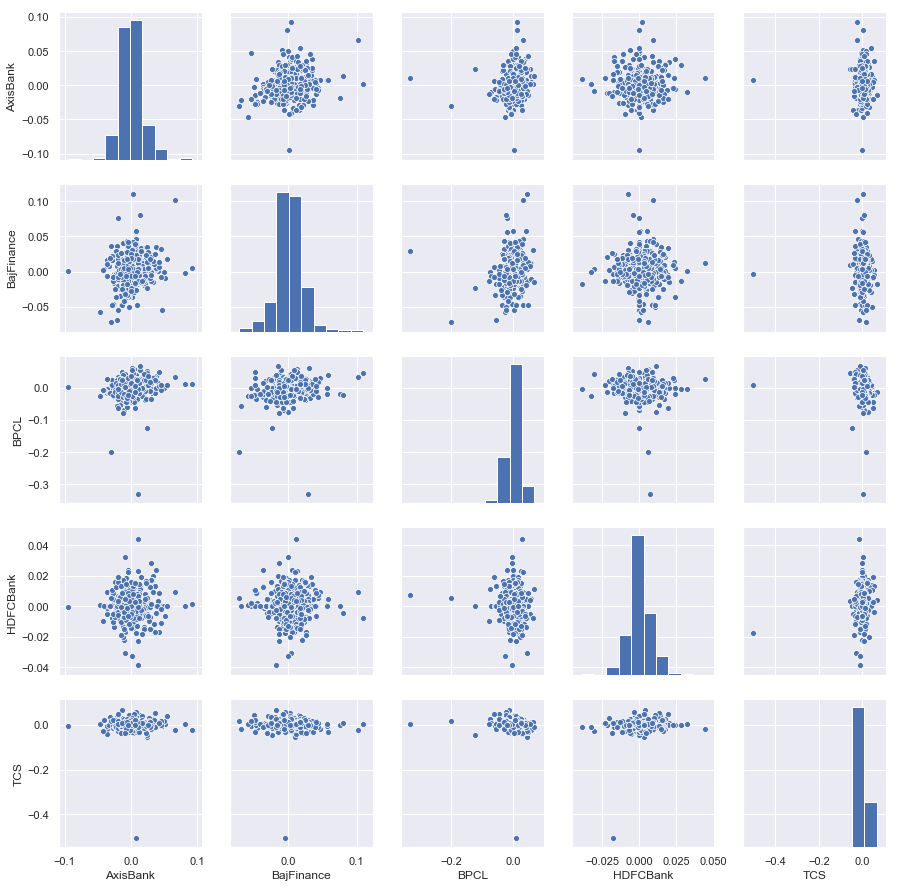

In [46]:
import seaborn as sns

sns.set(color_codes=True)
sns.pairplot(pct_change_dataFrame)

# Query 2.7
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read. You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values. Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [47]:
import matplotlib.pyplot as plt
rolling_avg_axisbank = pct_change_dataFrame['AxisBank'].rolling(7).mean()
rolling_avg_axisbank

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.000206
7     -0.000165
8      0.001766
9      0.002522
10     0.004418
11     0.003615
12     0.003347
13     0.002510
14     0.002531
15     0.001773
16    -0.000312
17     0.001981
18     0.000398
19    -0.000087
20    -0.000477
21    -0.000422
22    -0.001136
23    -0.000709
24    -0.001027
25     0.001257
26    -0.000441
27     0.000125
28     0.000491
29    -0.001312
         ...   
465    0.004710
466    0.005530
467    0.003131
468    0.001957
469    0.002047
470    0.003090
471    0.001028
472    0.000623
473   -0.004828
474   -0.002531
475   -0.000867
476   -0.002808
477    0.000579
478    0.000176
479    0.001712
480    0.003155
481   -0.001419
482   -0.001368
483    0.000162
484   -0.004394
485   -0.000450
486   -0.000689
487   -0.003408
488    0.000440
489   -0.000993
490   -0.001987
491   -0.000942
492   -0.005480
493   -0.005995
494   -0.003867
Name: AxisBank, Length: 

In [48]:
stand_axisbank = rolling_avg_axisbank.fillna(0).std()
stand_axisbank

0.006252971556471658

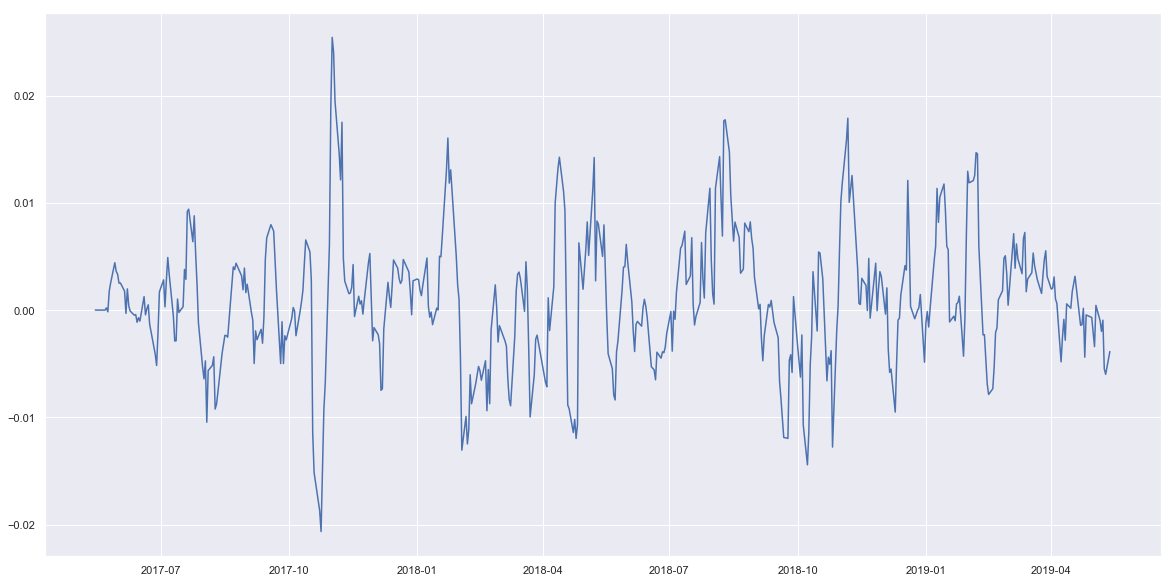

In [49]:
import pandas as pd
crrDate = pd.to_datetime(filter_axisbank['Date'])
crrLis = crrDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(crrLis,rolling_avg_axisbank.fillna(0).tolist())
plt.show()

# Query 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [54]:
nif_load = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Nifty50\Nifty50.csv")
nif_load

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
5,22-May-2017,9480.25,9498.65,9427.90,9438.25,202874757,9432.97
6,23-May-2017,9445.05,9448.05,9370.00,9386.15,231345629,11553.27
7,24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95
8,25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26
9,26-May-2017,9507.75,9604.90,9495.40,9595.10,225647631,11204.36


<Figure size 1440x720 with 0 Axes>

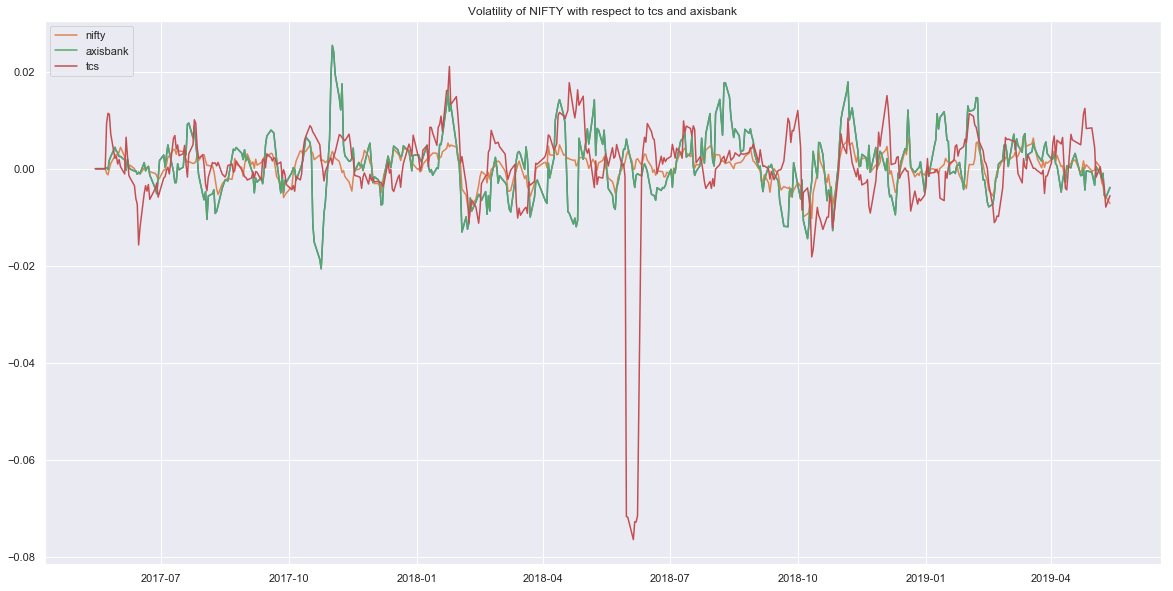

In [56]:
nif_close_price = nif_load['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nif_load['Date'])
nifDate = nifDate.tolist()
plt.figure(figsize=(20,10))

tcs_Date = pd.to_datetime(filter_tcs['Date'])
tcsLis = tcs_Date.tolist()
tcs_close_price = filter_tcs['Close Price']
tcs_change = tcs_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize=(20,10))
plt.plot(tcsLis,rolling_avg_axisbank.fillna(0).tolist())

plt.title("Volatility of NIFTY with respect to tcs and axisbank")
plt.plot(nifDate,nif_change.tolist(),label = 'nifty')
plt.plot(crrLis,rolling_avg_axisbank.fillna(0).tolist(),label = 'axisbank')
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

# Query 2.9
Trade Calls - Using Simple Moving Averages. Study about moving averages here.Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. One of the most widely used technical indicators.

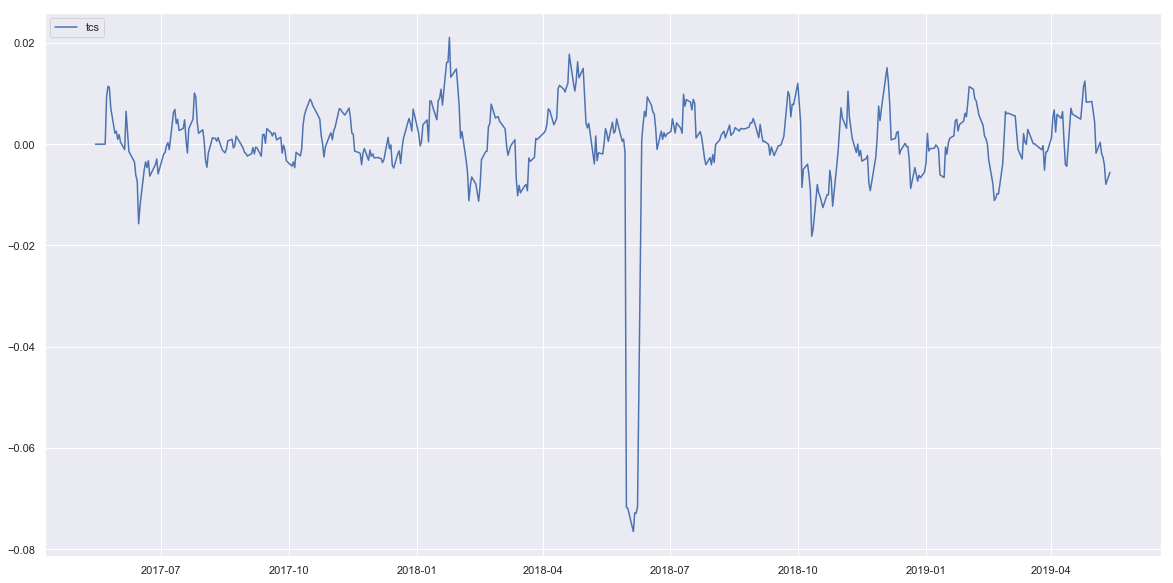

In [57]:
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

In [59]:
import numpy as np
#making short and long signals
short_window = 21
long_window = 34

signals = pd.DataFrame(index=filter_tcs.index)
signals['signal'] = 0.0

#SMA of Short Window
signals['short_mavg'] = filter_tcs['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

#SMA of Long Window
signals['long_mavg'] = filter_tcs['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

#Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

#Generate trading orders
signals['positions'] = signals['signal'].diff()
print(signals)

     signal   short_mavg    long_mavg  positions
0       0.0  2365.100000  2365.100000        NaN
1       0.0  2397.125000  2397.125000        0.0
2       0.0  2416.533333  2416.533333        0.0
3       0.0  2446.450000  2446.450000        0.0
4       0.0  2458.590000  2458.590000        0.0
5       0.0  2470.716667  2470.716667        0.0
6       0.0  2478.000000  2478.000000        0.0
7       0.0  2488.143750  2488.143750        0.0
8       0.0  2503.305556  2503.305556        0.0
9       0.0  2510.800000  2510.800000        0.0
10      0.0  2516.440909  2516.440909        0.0
11      0.0  2519.329167  2519.329167        0.0
12      0.0  2521.426923  2521.426923        0.0
13      0.0  2523.725000  2523.725000        0.0
14      0.0  2526.470000  2526.470000        0.0
15      0.0  2531.312500  2531.312500        0.0
16      0.0  2541.000000  2541.000000        0.0
17      0.0  2545.125000  2545.125000        0.0
18      0.0  2543.886842  2543.886842        0.0
19      0.0  2542.04

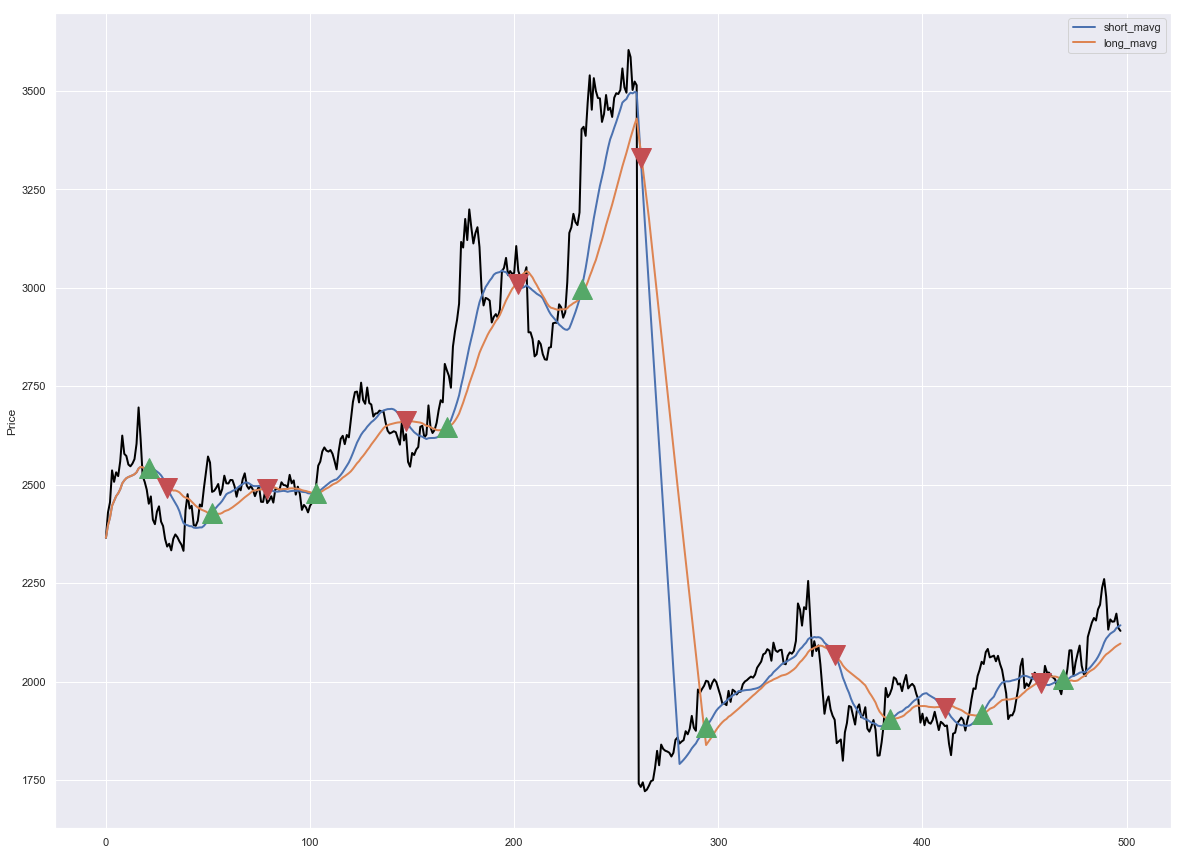

In [60]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
filter_tcs['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

# Query 2.10 Trade Calls - Using Bollinger Bands
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points- 

>The 14 day rolling mean of the closing price (we call it the average) 

>Upper band which is the rolling mean + 2 standard deviations away from the average. 

>Lower band which is the rolling mean - 2 standard deviations away from the average. 

>Average Daily stock price. 

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. Save to a new csv file.

ValueError: operands could not be broadcast together with shapes (522,) (498,) 

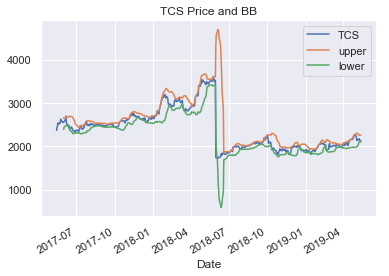

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'TCS'

# read csv file, use date as index and read close as a column
df = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\TCS.csv".format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# calculate the standar deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()